# Hurricane Distribution

In [1]:
# Convenient jupyter setup
%load_ext autoreload
%autoreload 2
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import xarray as xr
from sithom.plot import plot_defaults
from sithom.xr import plot_units
from src.constants import IBTRACS_NC

plot_defaults()

In [3]:
from src.data_loading.ibtracs import gom_tcs

In [83]:
gtcs = gom_tcs()

[35, -100, 15, -80]
'filter_by_bbox'  28.51767 s 



In [82]:
gtcs

IndexError: The indexing operation you are attempting to perform is not valid on netCDF4.Variable object. Try loading your data into memory first by calling .load().

<xarray.Dataset>
Dimensions:           (storm: 0, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:               

In [22]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 944, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 37.0 41.0 1.0 99.0 ... 49.0 17.0 111.0
    sid               (storm) |S13 b'1851175N26270' ... b'1973289N16278'
    season            (storm) float32 1.851e+03 1.851e+03 ... 1.973e+03
    number            (storm) int16 5 6 7 10 11 12 14 ... 46 90 83 92 94 104 115
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

In [8]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Occurance')

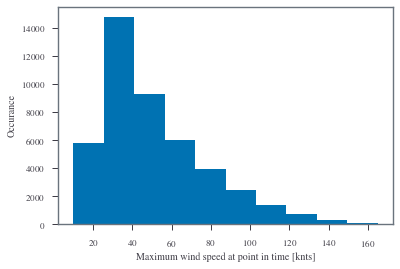

In [45]:
plt.hist(gtcs.usa_wind.values.ravel())
plt.xlabel("Maximum wind speed at point in time [knts]")
plt.ylabel("Occurance")

In [16]:
gtcs.usa_wind.values.shape

(944, 360)

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_39225/2776953728.py:2: RuntimeWarning: All-NaN slice encountered
  plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))


Text(0, 0.5, 'Occurance')

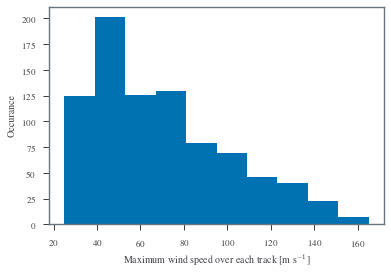

In [21]:
import numpy as np
plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [m s$^{-1}$]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_39225/3560916997.py:2: RuntimeWarning: All-NaN slice encountered
  plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))


Text(0, 0.5, 'Occurance')

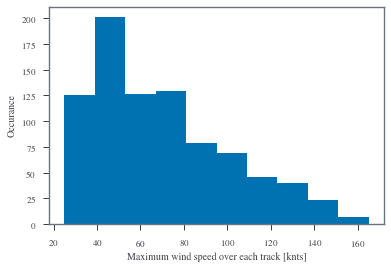

In [44]:
import numpy as np
plt.hist(np.nanmax(gtcs.usa_wind.values, axis=1))
plt.xlabel("Maximum wind speed over each track [knts]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_39225/4291835542.py:2: RuntimeWarning: All-NaN slice encountered
  plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))


Text(0, 0.5, 'Occurance')

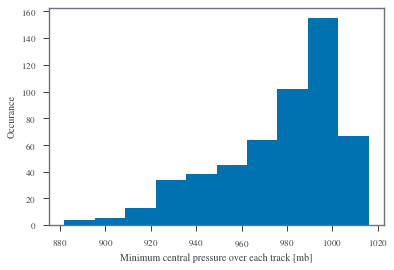

In [25]:
import numpy as np
plt.hist(np.nanmin(gtcs.usa_pres.values, axis=1))
plt.xlabel("Minimum central pressure over each track [mb]")
plt.ylabel("Occurance")

Text(0, 0.5, 'Occurance')

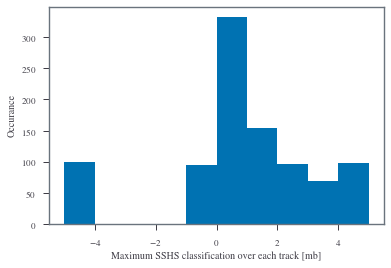

In [26]:
plt.hist(np.nanmax(gtcs.usa_sshs.values, axis=1))
plt.xlabel("Maximum SSHS classification over each track [mb]")
plt.ylabel("Occurance")

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_39225/2708923850.py:1: RuntimeWarning: All-NaN slice encountered
  plt.scatter(np.nanmin(gtcs.usa_pres.values, axis=1), np.nanmax(gtcs.usa_wind.values, axis=1), c=np.nanmax(gtcs.usa_sshs.values, axis=1))


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

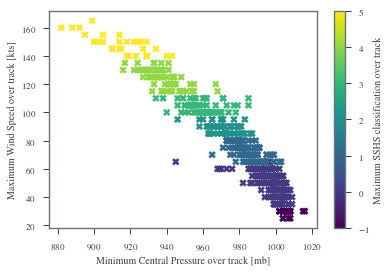

In [43]:
plt.scatter(np.nanmin(gtcs.usa_pres.values, axis=1), np.nanmax(gtcs.usa_wind.values, axis=1), c=np.nanmax(gtcs.usa_sshs.values, axis=1))
plt.colorbar(label="Maximum SSHS classification over track")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")

In [37]:
np.nanmax(gtcs.usa_sshs.values, axis=1).shape

(944,)

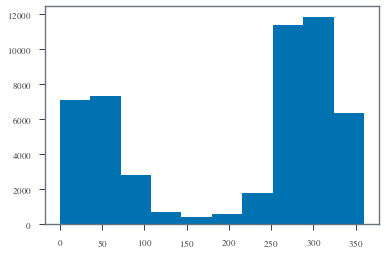

In [59]:
output = plt.hist(gtcs.storm_dir.values.ravel())

In [61]:
output = plt.hist(gtcs.storm_dir.values.ravel())
plt.clf()
points = output[0]
rads = output[1] / 2 / np.pi

array([  0.,  36.,  72., 108., 144., 180., 216., 252., 288., 324., 360.],
      dtype=float32)

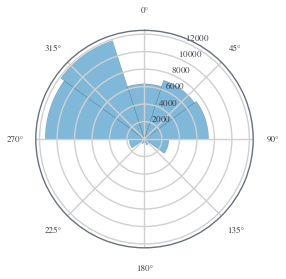

In [79]:
import numpy as np
import matplotlib.pyplot as plt

output = plt.hist(gtcs.storm_dir.values.ravel())
points = output[0]
rads = output[1] / 360 * 2 * np.pi
plt.clf()
ax = plt.subplot(projection="polar")
ax.bar(
    rads[1:],
    points,
    width=2 * np.pi / len(points),
    bottom=0.0,
    alpha=0.5,
    edgecolor="black",
)
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

In [69]:
rads.shape

(11,)

In [71]:
points.shape

(10,)

In [75]:
points

array([ 7073.,  7334.,  2795.,   699.,   396.,   559.,  1755., 11357.,
       11845.,  6318.])

In [84]:
gtcs

<xarray.Dataset>
Dimensions:           (storm: 944, date_time: 360, quadrant: 4)
Coordinates:
    time              (storm, date_time) datetime64[ns] ...
    lat               (storm, date_time) float32 ...
    lon               (storm, date_time) float32 ...
Dimensions without coordinates: storm, date_time, quadrant
Data variables: (12/147)
    numobs            (storm) float32 ...
    sid               (storm) |S13 ...
    season            (storm) float32 ...
    number            (storm) int16 ...
    basin             (storm, date_time) |S2 b'NA' b'NA' b'NA' ... b'' b'' b''
    subbasin          (storm, date_time) |S2 ...
    ...                ...
    reunion_gust      (storm, date_time) float32 ...
    reunion_gust_per  (storm, date_time) float32 ...
    usa_seahgt        (storm, date_time) float32 ...
    usa_searad        (storm, date_time, quadrant) float32 ...
    storm_speed       (storm, date_time) float32 ...
    storm_dir         (storm, date_time) float32 ...
Attributes: (12/50)
    title:                      IBTrACS - International Best Track Archive fo...
    summary:                    The intent of the IBTrACS project is to overc...
    source:                     The original data are tropical cyclone positi...
    Conventions:                ACDD-1.3
    Conventions_note:           Data are nearly CF-1.7 compliant. The sole is...
    product_version:            v04r00
    ...                         ...
    license:                    These data may be redistributed and used with...
    featureType:                trajectory
    cdm_data_type:              Trajectory
    comment:                    The tracks of TCs generally look like a traje...
    nco_openmp_thread_number:   1
    NCO:                        4.4.3

/var/folders/q5/n7rv_91d6b58cbb5xkzlsc4c0000gn/T/ipykernel_39225/2449705582.py:1: RuntimeWarning: All-NaN slice encountered
  plt.scatter(np.nanmin(gtcs.cma_pres.values, axis=1), np.nanmax(gtcs.cma_wind.values, axis=1), c=np.nanmax(gtcs.cma_cat.values, axis=1))


Text(0.5, 0, 'Minimum Central Pressure over track [mb]')

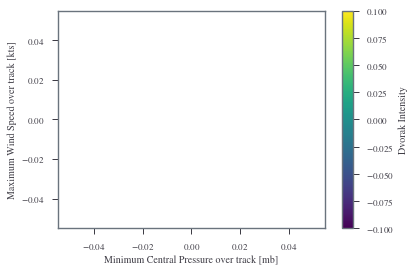

In [86]:
plt.scatter(np.nanmin(gtcs.cma_pres.values, axis=1), np.nanmax(gtcs.cma_wind.values, axis=1), c=np.nanmax(gtcs.cma_cat.values, axis=1))
plt.colorbar(label="Dvorak Intensity")
plt.ylabel("Maximum Wind Speed over track [kts]")
plt.xlabel("Minimum Central Pressure over track [mb]")